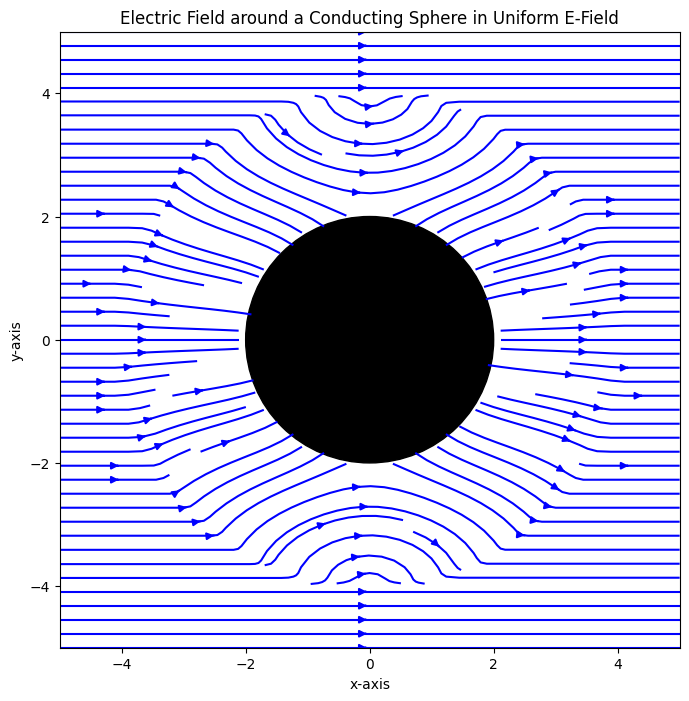

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid (zoomed out for better uniform field representation)
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Sphere parameters
a = 2  # Sphere radius
E0 = 1  # Uniform field strength

# Transition parameters
r_trans_start = a + 0.1  # Start of the transition region
r_trans_end = 2 * a      # End of the transition region

# Convert to polar coordinates
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

# Mask inside the conducting sphere (ensure the field is zero inside)
mask = r < a

# Initialize field components
Er = np.zeros_like(r)
Etheta = np.zeros_like(r)

# Apply dipole-like field near the surface of the sphere (as r -> a)
# Enforce boundary condition: P / (4 pi epsilon_0 r^2) = E0 r at the sphere surface
close_to_sphere = (r >= a) & (r < a + 0.1)  # Close to the sphere
Er[close_to_sphere] = (2 * a**3 / r[close_to_sphere]**3 + 1) * E0 * np.cos(theta[close_to_sphere])  # Field along r
Etheta[close_to_sphere] = (a**3 / r[close_to_sphere]**3 - 1) * E0 * np.sin(theta[close_to_sphere])  # Field along theta

# Apply uniform field for far distances (r > 2 * a)
far_from_sphere = r >= r_trans_end
Er[far_from_sphere] = E0 * np.ones_like(Er[far_from_sphere])  # E0 in x-direction
Etheta[far_from_sphere] = 0  # No theta component for uniform field

# Smooth transition for intermediate region using a simple linear interpolation
transition_region = (r >= r_trans_start) & (r < r_trans_end)
transition_factor = (r[transition_region] - r_trans_start) / (r_trans_end - r_trans_start)
Er[transition_region] = (1 - transition_factor) * (2 * a**3 / r[transition_region]**3 + 1) * E0 * np.cos(theta[transition_region]) + \
                        transition_factor * E0 * np.cos(theta[transition_region])
Etheta[transition_region] = (1 - transition_factor) * (a**3 / r[transition_region]**3 - 1) * E0 * np.sin(theta[transition_region]) + \
                             transition_factor * E0 * np.sin(theta[transition_region])

# Convert to Cartesian components
Ex = Er * np.cos(theta) - Etheta * np.sin(theta)
Ey = Er * np.sin(theta) + Etheta * np.cos(theta)

# Superimpose uniform field to the total field in the regions where dipole field is active
Ex += E0  # Add uniform field in the x-direction
Ey += 0   # No component in the y-direction for the uniform field

# For the far region, ensure the field is pointing in the x-direction
Ex[far_from_sphere] = E0
Ey[far_from_sphere] = 0

# Ensure field is zero inside the sphere
Ex[mask] = 0
Ey[mask] = 0

# Plot field lines
fig, ax = plt.subplots(figsize=(8, 8))
ax.streamplot(X, Y, Ex, Ey, color="b", density=1.5)

# Draw conducting sphere
circle = plt.Circle((0, 0), a, color="k", fill=True)
ax.add_patch(circle)

# Labels and display
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title("Electric Field around a Conducting Sphere in Uniform E-Field")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


# Chat logs

how would i show how a neutral sphere made of a conductor affects the unifrom  efield of E=<E,0,0> with a python script

the behavior near the sphere is E(r,\theta)=<(2a^3/r^3+1)E_0 cos(\theta), (a^3/r^3-1)E_0 sin(\theta)> where a is the sphere of the radius and r is the radius of the of the effective dipole where r= (P/(4 \pi \epsilon_0 E_0))^(1/3)

Better but there was an oversight on my part. for the area where the dipole field is active the field should be super impose by E_0 as well becuase theyre vectors

# Sources
https://www.youtube.com/watch?v=lSC7PDLSAfA Dr Ben Yelverton